# 1. Dependencies

In [234]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import category_encoders as ce
from keras.layers import *
from keras.applications import *
from keras.models import *
from keras.utils import *
import keras.metrics as metrics

# 2. Data Preprocessing and Pipeline 

In [235]:
# reading  and analyzing the data files
train = pd.read_excel("Train_dataset.xlsx")
test = pd.read_excel("Test_dataset.xlsx")

## 2.1 Cleaning the data (Removing the redundant/irrelevant variable)

In [236]:
'''People_Id, Name does not determine(or might be but its rarest) Infect_prod, Designation and Gender are same '''

'People_Id, Name does not determine(or might be but its rarest) Infect_prod, Designation and Gender are same '

In [237]:
train_df = train_df.drop(columns=['Name', 'Designation', 'people_ID'], axis=1);
test_df = test_df.drop(columns=['Name', 'Designation', 'people_ID'], axis=1)

In [238]:
train_df.head(5)

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [239]:
train.dropna(inplace=True)

In [240]:
test_copy = test_df.replace("nan", np.nan)

## 2.3 Handling the Missing values
- We going to deal with the numerical missing data and categorical missing data differently

In [247]:
# how many missing values each col has
for col in train_df.columns:
    print(train_df[col].isnull().values.sum())

0
0
0
311
747
3
0
0
226
0
0
0
97
716
924
16
1114
1114
35
0
0
1090
0
723
0


In [248]:
num_train = train_df.select_dtypes(include='number');
cat_train = train_df.select_dtypes(exclude='number');

In [249]:
num_test = test_df.select_dtypes(include='number');
cat_test = test_df.select_dtypes(exclude='number');

In [250]:
print(f'{train_df.shape[1] == num_train.shape[1] + cat_train.shape[1]}')

True


### 2.3.1 Numerical NaNs

In [251]:
from sklearn.impute import SimpleImputer

In [252]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [253]:
for col in num_train:
    train_df[[col]] = imputer.fit_transform(train_df[[col]])

### 2.3.2 Categorical NaNs

In [254]:
imputer = SimpleImputer(strategy='most_frequent')

In [255]:
for col in cat_train:
    train_df[[col]] = imputer.fit_transform(train_df[[col]])  

In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 25 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Married                   10714 non-null object
Children                  10714 non-null float64
Occupation                10714 non-null object
Mode_transport            10714 non-null object
cases/1M                  10714 non-null float64
Deaths/1M                 10714 non-null float64
comorbidity               10714 non-null object
Age                       10714 non-null float64
Coma score                10714 non-null float64
Pulmonary score           10714 non-null object
cardiological pressure    10714 non-null object
Diuresis                  10714 non-null float64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
Heart rate                10714 non-null float64
HDL cholesterol  

In [257]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 24 columns):
Region                    14498 non-null object
Gender                    14498 non-null object
Married                   14498 non-null object
Children                  14498 non-null int64
Occupation                14498 non-null object
Mode_transport            14498 non-null object
cases/1M                  14498 non-null int64
Deaths/1M                 14498 non-null int64
comorbidity               14498 non-null object
Age                       14498 non-null int64
Coma score                14498 non-null int64
Pulmonary score           14498 non-null object
cardiological pressure    14498 non-null object
Diuresis                  14498 non-null int64
Platelets                 14498 non-null int64
HBB                       14498 non-null int64
d-dimer                   14498 non-null int64
Heart rate                14498 non-null int64
HDL cholesterol           14498 non-n

## 2.4 Pair Visualization

In [258]:
x_vars = train_df.columns[:-1]
y_vars = train_df.columns[-1]

In [259]:
# this is a pretty resource consuming plot hence avoid it untill you have enough memory and processing power
# sns.pairplot(train_df, x_vars=x_vars, y_vars=y_vars, diag_kind="kde", hue='Gender');

In [260]:
# from the above plot we can drive many conclusion such that Infect_Prob is 
# lower among Married folks similarly we can drive many conclusion

## 2.5 Dealing with Categorical Data

In [261]:
from sklearn.preprocessing import LabelEncoder

In [262]:
Y = train_df.Infect_Prob
X = train_df.drop(columns=['Infect_Prob'], axis=1)

In [263]:
encoder = LabelEncoder()
# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.CatBoostEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.JamesSteinEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])
# encoder = ce.MEstimateEncoder(cols=[...])
# encoder = ce.OrdinalEncoder(cols=[...])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.WOEEncoder(cols=[...])

In [264]:
for col in cat_train:
    X[col]  = encoder.fit_transform(X[col])
    

In [265]:
for col in cat_test:
    test_df[col] = encoder.fit_transform(test_df[col])

In [266]:
X.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,1,0,1,1.0,4,1,2.0,0.0,2,68.0,8.0,3,1,441.0,154.0,93.0,233.0,82.0,58.0,27.0,7.0,3600000.0,1300000.0,2.0
1,1,0,1,2.0,4,2,2.0,0.0,1,64.0,15.0,0,3,276.0,121.0,56.0,328.0,89.0,68.0,5.0,6.0,1600000.0,400000.0,1.0
2,1,0,0,1.0,1,1,2.0,0.0,3,19.0,13.0,2,0,416.0,124.0,137.0,213.0,77.0,43.0,40.0,6.0,3400000.0,900000.0,1.0
3,1,0,1,1.0,3,0,2.0,0.0,0,33.0,9.0,1,2,410.0,98.0,167.0,275.0,64.0,60.0,27.0,7.0,700000.0,2300000.0,1.0
4,1,0,0,2.0,6,0,2.0,0.0,1,23.0,7.0,3,1,390.0,21.0,153.0,331.0,71.0,64.0,32.0,7.0,3200000.0,1100000.0,1.0


In [267]:
test_df['Pulmonary score']

0        1
1        1
2        0
3        2
4        1
        ..
14493    3
14494    2
14495    2
14496    1
14497    1
Name: Pulmonary score, Length: 14498, dtype: int32

In [268]:
x_vars = X.columns[:-1]
y_vars = X.columns[-1]

# 2. Data Pipeline

In [269]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [200]:
X = preprocessing.normalize(X, axis=1)

In [270]:
X_train, X_val, Y_train, Y_val = train_test_split(X_normalized,  Y.values, test_size=0.1, random_state=42)

In [271]:
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(9642, 24) (1072, 24) (9642,) (1072,)


In [204]:
# preprocessing.axis([[10, 2, 30]], axis=0)

# 3. Models and Training

In [122]:
def dnn():
    model  = Sequential()
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    return model
    

In [125]:
model = dnn()

In [128]:
# traing 
# history = model.fit(X_train,Y_train,epochs=50,validation_data=(X_val,Y_val),verbose=1)

In [61]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

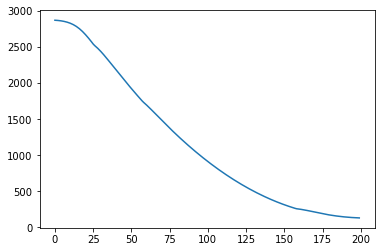

In [65]:
plt.plot(val_loss, label="val_loss")
plt.show()

In [272]:
def r2_score(y_true,y_pred):
    num = K.sum(K.square(y_true-y_pred))
    denom = K.sum(K.square(y_true- K.mean(y_true)))
    return (1-num/denom)

In [129]:
Y_val[:10]

array([47.30837595, 48.97426018, 47.28339403, 46.97029262, 97.632     ,
       45.27885255, 49.24589749, 41.98176   , 46.3032033 , 45.88704   ])

### Boosting Models

In [273]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [274]:
grad_boost = GradientBoostingRegressor(
                n_estimators=100, 
                learning_rate=0.1, 
                max_depth=10, 
                random_state=12, 
                loss='ls').fit(X_train, Y_train)

In [275]:
ada_boost = AdaBoostRegressor(random_state=10, n_estimators=100).fit(X_train, Y_train)

In [276]:
print(f'Training score:\n grad_boost_r2score = {grad_boost.score(X_train, Y_train)} \n ada_boost_r2score = {ada_boost.score(X_train, Y_train)}')
print(f'Validation score:\n grad_boost_r2score = {grad_boost.score(X_val, Y_val)} \n ada_boost_r2score = {ada_boost.score(X_val, Y_val)}')

Training score:
 grad_boost_r2score = 0.9740469985434376 
 ada_boost_r2score = 0.2968799022532723
Validation score:
 grad_boost_r2score = 0.11144791356507633 
 ada_boost_r2score = 0.2508984810674758


In [277]:
list(grad_boost.predict(X_val)[100:110])

[50.016447455309496,
 62.66938943652486,
 46.884013460057304,
 67.24045427182362,
 55.02931685966792,
 48.59913303912107,
 48.01882658730895,
 48.319663521898654,
 47.023583845138546,
 48.7828814127857]

In [280]:
list(ada_boost.predict(X_test)[100:110])

[49.129201692019606,
 65.136816,
 46.90841046764448,
 65.136816,
 55.88024090526858,
 49.129201692019606,
 49.129201692019606,
 49.129201692019606,
 46.90841046764448,
 49.129201692019606]

In [278]:
list(Y_val[100:110])

[49.3814598,
 38.07648,
 46.37133441,
 93.72672,
 52.35127748,
 49.9163627,
 48.35860012,
 48.30335398,
 46.6405469,
 49.70742401]

### Conclusion: Gradient Boosting Regressor perfroms better

### Inference

In [281]:
preds = grad_boost.predict(test_df.values)

In [282]:
preds_df = pd.DataFrame(data=preds, columns=['Infect_prob'])

In [283]:
result = pd.concat([people_ID, preds_df], axis=1)

In [284]:
result.to_csv('infect_prob.csv', index=False)

### What could be done to improve the result
- More Feature Engineering
    - From the dendrogram we can see that some features have very little to no impact(zero correlation) on dependent variable Infect_prob one can do the manuever by removing them and training the models again
    - Another good practice for such task is eliminating the outliers
- More Models
    - We can fit more models and see the results
- Preprocessing
    - We could use grid search to find best strategy for imputation and Categorical Data Encoder(listed in cell)
    